In [1]:
#importing data
import pandas as pd
import numpy as np
from datetime import datetime, timedelta 
import matplotlib.pyplot as plt

In [2]:
#reading data
df=pd.read_csv("C:\\Users\\Deepanshu Dutta\\datascience\\work\\data\\order_details_20thNov.csv")

## basic EDA

In [3]:
#shape of the data
df.shape

(1457, 29)

In [4]:
df.columns

Index(['_id__$oid', 'last_modified__$date', 'delivery_lat',
       'assigned_delivery_boy_id', 'trash', 'created_at__$date',
       'delivery_lon', 'outlet_id', 'order_status', 'status', 'order_id',
       'order_status_id', 'preparation_time', 'committed_time', 'eta',
       'time_of_delivery', 'arrival_time_duration',
       'delivery_boy_assigning_time__$date', 'actual_preparaed_time',
       'pickup_time', 'approve_time', 'reaching_time__$date',
       'arrival_time__$date', 'outlet_distance_from_delivery_person',
       'assigning_lat_lon__001', 'assigning_lat_lon__002',
       'destination_km_distance', 'destination_journey_duration',
       'total_distance_travel_for_delivery'],
      dtype='object')

In [5]:
df.dtypes

_id__$oid                                object
last_modified__$date                     object
delivery_lat                            float64
assigned_delivery_boy_id                 object
trash                                     int64
created_at__$date                        object
delivery_lon                            float64
outlet_id                                 int64
order_status                             object
status                                   object
order_id                                  int64
order_status_id                         float64
preparation_time                         object
committed_time                           object
eta                                      object
time_of_delivery                         object
arrival_time_duration                    object
delivery_boy_assigning_time__$date       object
actual_preparaed_time                    object
pickup_time                              object
approve_time                            

In [6]:
#Checking the presence of missing values
val = df.isnull().values.any()
if val == True :
    print("Missing values present : ", df.isnull().values.sum() )
else:
    print("No missing values Present")

Missing values present :  16698


In [7]:
df.dtypes

_id__$oid                                object
last_modified__$date                     object
delivery_lat                            float64
assigned_delivery_boy_id                 object
trash                                     int64
created_at__$date                        object
delivery_lon                            float64
outlet_id                                 int64
order_status                             object
status                                   object
order_id                                  int64
order_status_id                         float64
preparation_time                         object
committed_time                           object
eta                                      object
time_of_delivery                         object
arrival_time_duration                    object
delivery_boy_assigning_time__$date       object
actual_preparaed_time                    object
pickup_time                              object
approve_time                            

In [8]:
#missing values by columns
df.isnull().sum()

_id__$oid                                  0
last_modified__$date                       0
delivery_lat                               0
assigned_delivery_boy_id                   4
trash                                      0
created_at__$date                          0
delivery_lon                               0
outlet_id                                  0
order_status                               5
status                                     0
order_id                                   0
order_status_id                            5
preparation_time                           7
committed_time                           899
eta                                      899
time_of_delivery                        1043
arrival_time_duration                    901
delivery_boy_assigning_time__$date       917
actual_preparaed_time                    951
pickup_time                             1036
approve_time                             948
reaching_time__$date                    1132
arrival_ti

In [9]:
#sample data
#df.head(10)
df.status.value_counts()

New                      892
delivery boy assigned    565
Name: status, dtype: int64

In [10]:
#converting date to datetime object for easy analysis
df['last_modified__$date']=pd.to_datetime(df['last_modified__$date'])
df.head()

,_id__$oid,last_modified__$date,delivery_lat,assigned_delivery_boy_id,trash,created_at__$date,delivery_lon,outlet_id,order_status,status,...,pickup_time,approve_time,reaching_time__$date,arrival_time__$date,outlet_distance_from_delivery_person,assigning_lat_lon__001,assigning_lat_lon__002,destination_km_distance,destination_journey_duration,total_distance_travel_for_delivery
0,5f2549e3d1dfb3348735a34d,2020-08-01 11:49:07.775000+00:00,22.485330,21,0,2020-08-01T10:54:27.698Z,88.326968,9,delivered,delivery boy assigned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f24f749e63cb52d5f17df46,2020-08-01 05:07:38.903000+00:00,22.585257,1,0,2020-08-01T05:02:01.993Z,88.422437,3,delivered,delivery boy assigned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f25372956c63423201653f7,2020-08-01 10:40:21.208000+00:00,22.492368,21,1,2020-08-01T09:34:33.451Z,88.280596,7,NaN,delivery boy assigned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5f257163d97253b6141c6471,2020-08-01 15:28:58.058000+00:00,22.509654,24,0,2020-08-01T13:42:59.337Z,88.309393,7,delivered,delivery boy assigned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5f25dc1f5ed457c026f875d9,2020-08-01 21:21:30.505000+00:00,22.585755,10,0,2020-08-01T21:18:23.947Z,88.421285,3,delivered,delivery boy assigned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.order_id

0          7
1          1
2          2
3          9
4         12
        ... 
1452    6216
1453    6221
1454    6225
1455    6228
1456    6234
Name: order_id, Length: 1457, dtype: int64

In [13]:
#extracting the week of the data
weeks=[]
for i in range(0,len(df['last_modified__$date'])):
    dt=df['last_modified__$date'][i]
    weeks.append(dt.isocalendar()[1])
df['week_number']=weeks

In [14]:
#removing the null values
df['order_status_id'].value_counts()
#we see that the maximum rows of order status id has the value 1 so we replace the nan values with 1
df['order_status_id']=df['order_status_id'].fillna(1)
#df.isnull().sum()

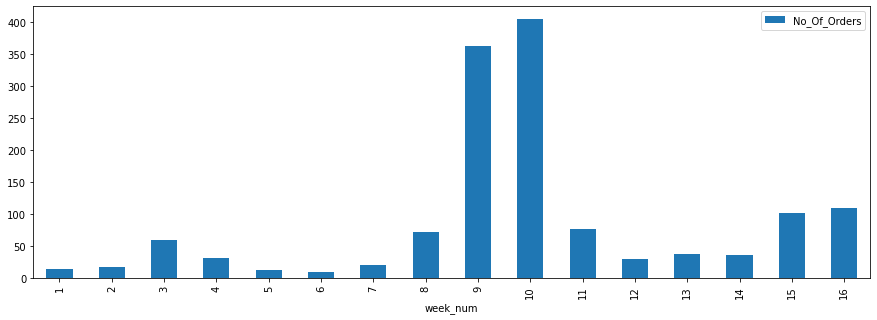

In [16]:
data=[df['week_number'],df['order_id']]
Q1 = pd.DataFrame(data=data)
Q1=Q1.T
weeknum=[]
no_of_orders=[]
for i in range(int(Q1['week_number'].iloc[0]),int(Q1['week_number'].iloc[-1])):
    weeknum.append((i-30))
    no_of_orders.append(int(Q1['week_number'][Q1['week_number']==i].value_counts().values))
data=[weeknum,no_of_orders]
Q1 = pd.DataFrame(data=data)
Q1=Q1.T
headers = ["week_num","No_Of_Orders"]
Q1.columns = headers
#Q1.head()
ax = Q1.plot(x="week_num", y="No_Of_Orders", kind="bar",figsize=[15,5])
plt.show()

In [18]:
weeknum

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

In [17]:
Q1.head()

,week_num,No_Of_Orders
0,1,15
1,2,17
2,3,60
3,4,32
4,5,13


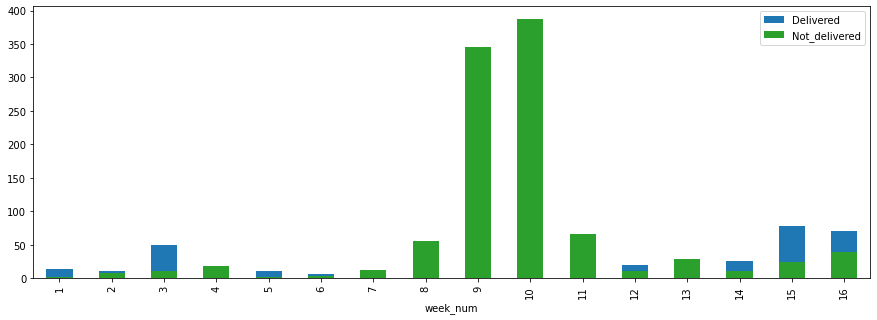

In [13]:
#saving the week number and order status in a different data frame
data=[df['week_number'],df['order_status_id']]
Q2 = pd.DataFrame(data=data)
Q2=Q2.T
Q2['is-Delivered']=Q2['order_status_id'].apply(lambda x:'Delivered' if x==6 else 'Not-Delivered')
#Q2['is-Delivered'].value_counts()
#counting the number of items delivered vs not delivered per week
delivered=[]
weeknum=[]
notdelivered=[]
for i in range(int(Q2['week_number'].iloc[0]),int(Q2['week_number'].iloc[-1])):
    weeknum.append((i-30))
    delivered.append(Q2['is-Delivered'][Q2['week_number']==i].value_counts()['Delivered'])
    notdelivered.append(Q2['is-Delivered'][Q2['week_number']==i].value_counts()['Not-Delivered'])
data=[weeknum,delivered,notdelivered]
Q2 = pd.DataFrame(data=data)
Q2=Q2.T
headers = ["week_num","Delivered","Not_delivered"]
Q2.columns = headers
#Q2.head()
ax = Q2.plot(x="week_num", y="Delivered", kind="bar",figsize=[15,5])
Q2.plot(x="week_num", y="Not_delivered", kind="bar", ax=ax, color="C2")
plt.show()

In [17]:
data=[df['eta'],df['time_of_delivery']]
Q5 = pd.DataFrame(data=data)
Q5=Q5.T
Q5['eta']=Q5['eta'].fillna("null")
Q5['time_of_delivery']=pd.to_datetime(Q5['time_of_delivery'])
Q5['time_of_delivery']=Q5['time_of_delivery'].fillna("null")
Ehr=0
ETD=[]
timediff=[]
length=0
for i in range(0,len(df['time_of_delivery'])):
    if(Q5['eta'][i] != "null" and Q5['time_of_delivery'][i] != "null"):
        Arr_T=Q5['time_of_delivery'][i].time()
        ETD=Q5['eta'][i].split(':')
        if(ETD[1].split()[1]=='PM'):
            Ehr=int(ETD[0])+12
        diff = (int(Arr_T.hour)*60+int(Arr_T.minute))-((Ehr*60)+int(ETD[1].split()[0]))
        timediff.append(diff)
        length+=1
#print(diff/length)
print(length)
print(sum(timediff)/length)

380
-49.39736842105263
